In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('economic_index.csv')

In [3]:
df

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256
5,5,2017,7,2.50,5.6,1254
6,6,2017,6,2.50,5.5,1234
7,7,2017,5,2.25,5.5,1195
8,8,2017,4,2.25,5.5,1159
9,9,2017,3,2.25,5.6,1167


In [8]:
## dropping the unnecessary rows and colums
df.drop(columns=['Unnamed: 0','year','month'],inplace=True)

In [9]:
df

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.50,5.5,1234
7,2.25,5.5,1195
8,2.25,5.5,1159
9,2.25,5.6,1167


In [10]:
import seaborn as sns

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


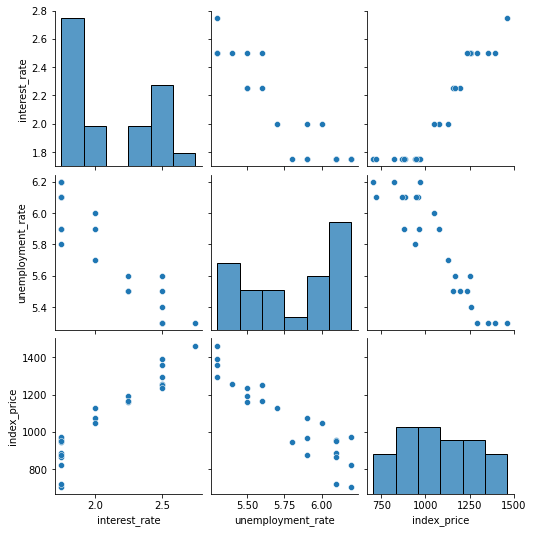

In [11]:
sns.pairplot(df)

In [12]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

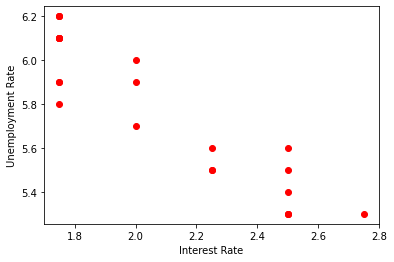

In [13]:
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='r')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')



In [16]:
X=df.iloc[:,:-1]  ## take all except the last

In [18]:
Y=df.iloc[:,-1]

In [20]:
#train test split
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.24,random_state=42)

<AxesSubplot:xlabel='interest_rate', ylabel='index_price'>

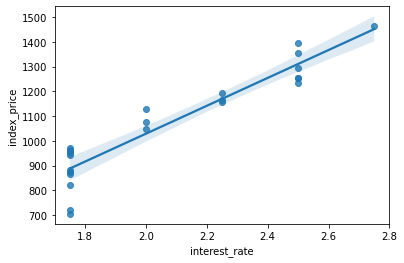

In [23]:
sns.regplot(x='interest_rate', y='index_price', data=df)

In [24]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler= StandardScaler()
scaler.fit_transform(X_train)

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [31]:
scaler.fit(X_test)

StandardScaler()

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
regression=LinearRegression()

In [35]:
regression.fit(X_train,Y_train)

LinearRegression()

In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
validation_score=cross_val_score(regression,X_train,Y_train,scoring='neg_mean_squared_error',cv=3)

In [40]:
np.mean(validation_score)

-5914.828180162381

In [41]:
## prediction

In [42]:
y_pred=regression.predict(X_test)

In [43]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [46]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(Y_test,y_pred)
mae=mean_absolute_error(Y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.762887712549
59.93578152323547
76.11677139574792


In [48]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,y_pred)
print(score)
#display adjusted R-squared
print(1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))

0.8278978091457151
0.7131630152428585


## Asssumptions

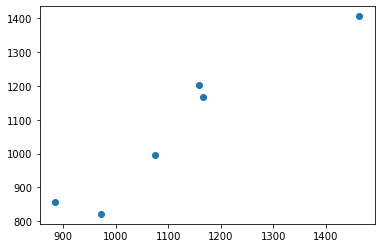

In [50]:
plt.scatter(Y_test,y_pred)

In [52]:
residuals=Y_test-y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

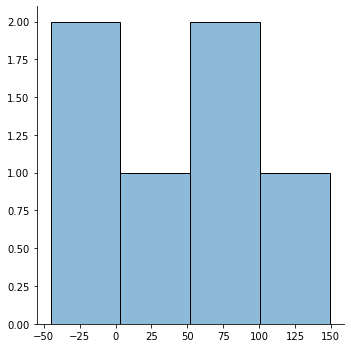

In [55]:
## Plot this residuals
sns.displot(residuals,kde=True)

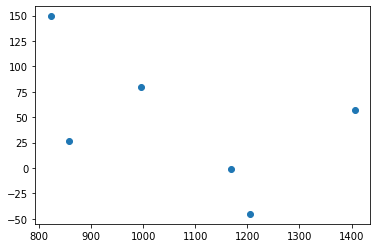

In [56]:
plt.scatter(y_pred,residuals)

In [60]:
## OLS Linear Regression
import statsmodels.api as sm
model=sm.OLS(Y_train,X_train).fit()

In [58]:
!!pip install statsmodels


['Defaulting to user installation because normal site-packages is not writeable',
 'Collecting statsmodels',
 '  Downloading statsmodels-0.14.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.8 MB)',
 '     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 5.8 MB/s eta 0:00:00',
 'Requirement already satisfied: numpy>=1.22.3 in /home/tamim/.local/lib/python3.10/site-packages (from statsmodels) (1.26.3)',
 'Collecting patsy>=0.5.6',
 '  Downloading patsy-0.5.6-py2.py3-none-any.whl (233 kB)',
 '     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 KB 5.6 MB/s eta 0:00:00',
 'Requirement already satisfied: scipy!=1.9.2,>=1.8 in /usr/lib/python3/dist-packages (from statsmodels) (1.8.0)',
 'Requirement already satisfied: pandas!=2.1.0,>=1.4 in /home/tamim/.local/lib/python3.10/site-packages (from statsmodels) (2.1.4)',
 'Requirement already satisfied: packaging>=21.3 in /home/tamim/.local/lib/python3.10/site-packages (from statsmodels) (23.2)',
 'Requirement already sa

In [61]:
model.summary()

/usr/lib/python3/dist-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              1468.
Date:                Tue, 09 Jul 2024   Prob (F-statistic):                    7.46e-19
Time:                        12:10:29   Log-Likelihood:                         -104.21
No. Observations:                  18   AIC:                                      212.4
Df Residuals:                      16   BIC:                                      214.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
interest_rate       569.9494     44.349     12.851      0.000     475.933     663.965
unemployment_rate   -20.5734     15.966     -1.289      0.216     -54.421      13.274
==============================================================================
Omnibus:                        1.657   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.437   Jarque-Bera (JB):                1.346
Skew:                          -0.611   Prob(JB):                        0.510
Kurtosis:                       2.451   Cond. No.                         14.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""